In [47]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the Census Data
from census import Census

In [48]:
poverty_data = (r"C:\Users\elcia\DS-VIRT-DATA-PT-11-2023-U-LOLC\Project1-Code-and-CSV\Elcia's Working Folder\combined_df.csv")

# Read in the data as CSV
poverty_data_df = pd.read_csv(poverty_data)
poverty_data_df

,Name,Household Income,Population,Median Age,Per Capita Income,Poverty,No Education,High School Education,GED,Associates,...,poverty_family_married,Single Male,Single Female,poverty_female,poverty_male,poverty_family,state,Zipcode,Year,Poverty Rate
0,ZCTA5 00601,13092.0,17242.0,40.5,6999.0,10772.0,492.0,2868.0,160.0,888.0,...,1223.0,215.0,988.0,5905.0,4867.0,2426.0,72.0,601,2018,62.475351
1,ZCTA5 00602,16358.0,38442.0,42.3,9277.0,19611.0,901.0,5751.0,947.0,3387.0,...,2360.0,502.0,1665.0,10077.0,9534.0,4527.0,72.0,602,2018,51.014515
2,ZCTA5 00603,16603.0,48814.0,41.1,11307.0,24337.0,924.0,8745.0,996.0,2370.0,...,2393.0,697.0,3349.0,13467.0,10870.0,6439.0,72.0,603,2018,49.856599
3,ZCTA5 00606,12832.0,6437.0,43.3,5943.0,4163.0,185.0,1284.0,138.0,241.0,...,421.0,109.0,251.0,2110.0,2053.0,781.0,72.0,606,2018,64.672984
4,ZCTA5 00610,19309.0,27073.0,42.1,10220.0,11724.0,643.0,4945.0,624.0,2241.0,...,1307.0,278.0,1029.0,6074.0,5650.0,2614.0,72.0,610,2018,43.305138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166903,ZCTA5 99923,-666666666.0,25.0,-666666666.0,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,99923,2022,0.000000
166904,ZCTA5 99925,80313.0,920.0,43.0,36414.0,143.0,0.0,191.0,63.0,53.0,...,4.0,1.0,15.0,56.0,87.0,20.0,NaN,99925,2022,15.543478
166905,ZCTA5 99926,78365.0,1465.0,37.9,29100.0,222.0,0.0,299.0,67.0,125.0,...,26.0,6.0,8.0,82.0,140.0,40.0,NaN,99926,2022,15.153584
166906,ZCTA5 99927,-666666666.0,14.0,-666666666.0,NaN,0.0,0.0,14.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,99927,2022,0.000000


In [49]:
selected_columns = ["Poverty","Year", "Poverty Rate", "Household Income", "Per Capita Income"]

#Dataframe for my part in group
data_choice = poverty_data_df[selected_columns]

#See if it works?
data_choice

#Boom girl it works!!

,Poverty,Year,Poverty Rate,Household Income,Per Capita Income
0,10772.0,2018,62.475351,13092.0,6999.0
1,19611.0,2018,51.014515,16358.0,9277.0
2,24337.0,2018,49.856599,16603.0,11307.0
3,4163.0,2018,64.672984,12832.0,5943.0
4,11724.0,2018,43.305138,19309.0,10220.0
...,...,...,...,...,...
166903,0.0,2022,0.000000,-666666666.0,NaN
166904,143.0,2022,15.543478,80313.0,36414.0
166905,222.0,2022,15.153584,78365.0,29100.0
166906,0.0,2022,0.000000,-666666666.0,NaN


In [110]:
data_choice_clean = data_choice[data_choice['Per Capita Income'] != -666666666]

In [111]:
data_choice_clean = data_choice[data_choice["Household Income"] != -666666666]

In [112]:
#select the years for Poverty Rate
the_years = range(2018,2023)
for year in the_years:
    average_poverty_rate = data_choice_clean [data_choice_clean['Year'] == year] ["Poverty Rate"].mean()
    print (f'Average Poverty Rate in {year}: {average_poverty_rate:.2f}%')


Average Poverty Rate in 2018: 13.65%
Average Poverty Rate in 2019: 13.23%
Average Poverty Rate in 2020: 12.74%
Average Poverty Rate in 2021: 12.60%
Average Poverty Rate in 2022: 12.52%


In [113]:
#select the years for Household Income

the_years = range(2018,2023)
for year in the_years:
    average_house_income = data_choice_clean[data_choice_clean['Year'] == year] ["Household Income"].mean()
    print (f'Average Household Income in {year}: ${average_house_income:.2f}')

Average Household Income in 2018: $59031.43
Average Household Income in 2019: $61302.54
Average Household Income in 2020: $63463.60
Average Household Income in 2021: $67280.94
Average Household Income in 2022: $73132.63


In [114]:
#select the years for Per Capita Income
the_years = range(2018,2023)
for year in the_years:
    average_income = data_choice_clean[data_choice_clean['Year'] == year] ["Per Capita Income"].mean()
    print (f'Average Income amount in {year}: ${ average_income:.2f}')

Average Income amount in 2018: $30138.09
Average Income amount in 2019: $31389.58
Average Income amount in 2020: $32478.07
Average Income amount in 2021: $34384.20
Average Income amount in 2022: $37676.29


In [115]:
#select the years for Poverty Rate
the_years = range(2018,2023)
for year in the_years:
    average_poverty = data_choice_clean[data_choice_clean['Year']== year] ["Poverty"].mean()
    print (f'Average Poverty level in {year}: {average_poverty:.2f}')

Average Poverty level in 2018: 1476.57
Average Poverty level in 2019: 1423.68
Average Poverty level in 2020: 1381.29
Average Poverty level in 2021: 1368.37
Average Poverty level in 2022: 1364.39


In [117]:

column_averages = data_choice_clean.mean()

row_averages = data_choice_clean.mean(axis=1)

column_averages.head()

Poverty               1403.032436
Year                  2019.994987
Poverty Rate            12.950836
Household Income     64828.547591
Per Capita Income    33206.105030
dtype: float64

In [118]:
row_averages.head()

0     6588.695070
1     9463.002903
2    10862.971320
3     5004.134597
4     8662.861028
dtype: float64

In [132]:
avarages = {
    
    "Poverty":[1476.57, 1423.68, 1381.29, 1368.37, 1364.39],
    "Poverty Rate":[13.65, 13.23, 12.74, 12.60, 12.52], 
    "Household Income": [59031.43, 61302.54, 63463.60, 67280.94, 73132.63],
    "Per Capita Income":[30138.09, 31389.58, 32478.07, 34384.20, 37676.29],

}

# Add a 'year' column
years = [2018, 2019, 2020, 2021, 2022]
poverty_data = pd.DataFrame(avarages, index=years)

poverty_data.head()

,Poverty,Poverty Rate,Household Income,Per Capita Income
2018,1476.57,13.65,59031.43,30138.09
2019,1423.68,13.23,61302.54,31389.58
2020,1381.29,12.74,63463.60,32478.07
2021,1368.37,12.60,67280.94,34384.20
2022,1364.39,12.52,73132.63,37676.29


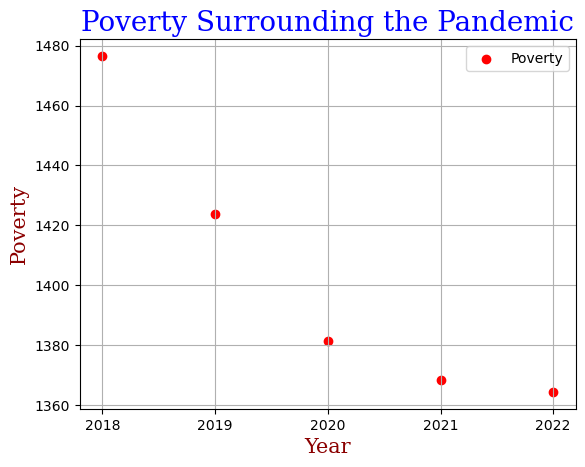

In [147]:
plt.scatter(poverty_data.index, average_income["Poverty"], label="Poverty", color="red")

font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

# Customize the plot
plt.title('Poverty Surrounding the Pandemic', fontdict = font1)
plt.xlabel('Year', fontdict = font2)
plt.ylabel("Poverty", fontdict = font2)
plt.legend()
plt.grid(True)



# Show the plot
plt.xticks(poverty_data.index)
plt.show()

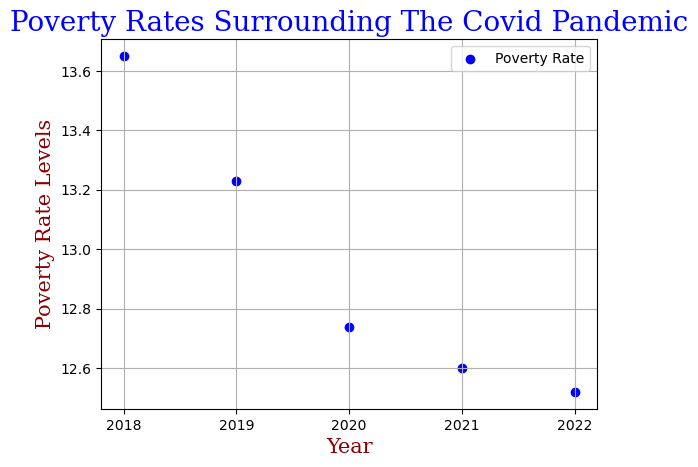

In [162]:
plt.scatter(poverty_data.index, average_income["Poverty Rate"], label="Poverty Rate", color="blue")
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

# Customize the plot
plt.title('Poverty Rates Surrounding The Covid Pandemic', fontdict = font1)
plt.xlabel('Year', fontdict = font2)
plt.ylabel("Poverty Rate Levels", fontdict = font2) 
plt.legend()
plt.grid(True)

# Show the plot
plt.xticks(poverty_data.index)
plt.show()

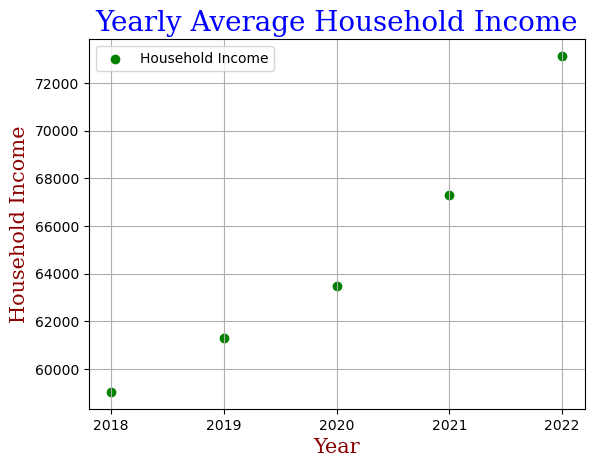

In [155]:
plt.scatter(poverty_data.index, average_income["Household Income"], label="Household Income", color="green")
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

# Customize the plot
plt.title('Yearly Average Household Income', fontdict = font1)
plt.xlabel('Year', fontdict = font2)
plt.ylabel("Household Income", fontdict = font2)
plt.legend()
plt.grid(True)

# Show the plot
plt.xticks(poverty_data.index)
plt.show()

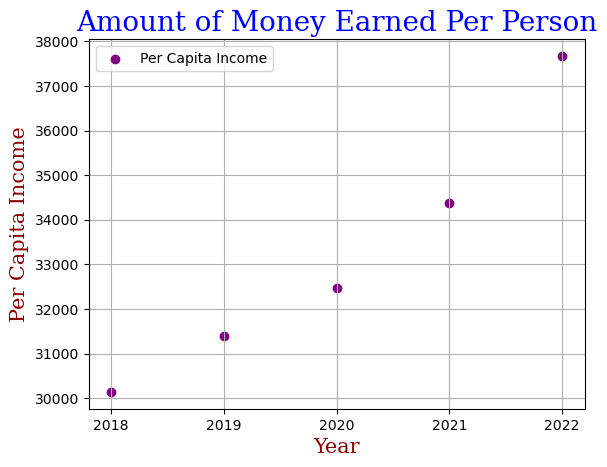

In [158]:
plt.scatter(poverty_data.index, average_income["Per Capita Income"], label="Per Capita Income", color="purple")
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

# Customize the plot
plt.title("Amount of Money Earned Per Person", fontdict = font1)
plt.xlabel('Year', fontdict = font2)
plt.ylabel("Per Capita Income", fontdict = font2)
plt.legend()
plt.grid(True)

# Show the plot
plt.xticks(poverty_data.index)
plt.show()

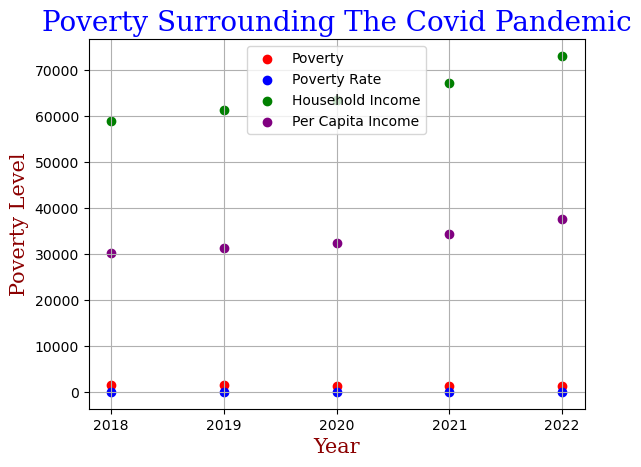

In [161]:
plt.scatter(poverty_data.index, average_income["Poverty"], label="Poverty", color="red")

plt.scatter(poverty_data.index, average_income["Poverty Rate"], label="Poverty Rate", color="blue")

plt.scatter(poverty_data.index, average_income["Household Income"], label="Household Income", color="green")

plt.scatter(poverty_data.index, average_income["Per Capita Income"], label="Per Capita Income", color="purple")

font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

# Customize the plot
plt.title('Poverty Surrounding The Covid Pandemic', fontdict=font1)
plt.xlabel('Year', fontdict=font2)
plt.ylabel('Poverty Level', fontdict=font2)
plt.legend()
plt.grid(True)

# Show the plot
plt.xticks(average_income.index)
plt.show()

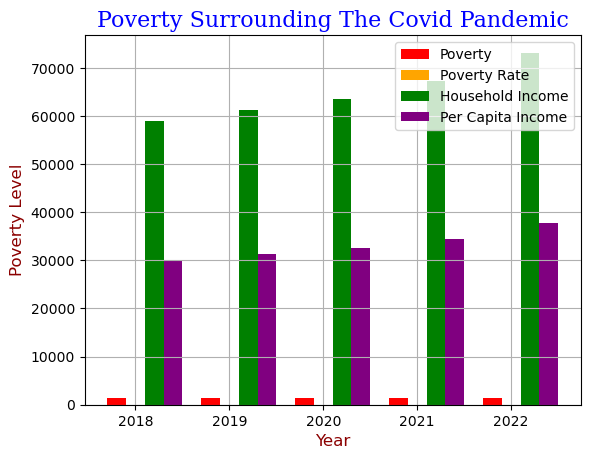

In [172]:
data = {
    'Year': [2018, 2019, 2020, 2021, 2022],
    "Poverty":[1476.57, 1423.68, 1381.29, 1368.37, 1364.39],
    "Poverty Rate":[13.65, 13.23, 12.74, 12.60, 12.52], 
    "Household Income": [59031.43, 61302.54, 63463.60, 67280.94, 73132.63],
    "Per Capita Income":[30138.09, 31389.58, 32478.07, 34384.20, 37676.29],
}

poverty_data = pd.DataFrame(data)
years = poverty_data['Year']

plt.bar(years - 0.2, poverty_data["Poverty"], width=0.2, label="Poverty", color="red")
plt.bar(years, poverty_data["Poverty Rate"], width=0.2, label="Poverty Rate", color="orange")
plt.bar(years + 0.2, poverty_data["Household Income"], width=0.2, label="Household Income", color="green")
plt.bar(years + 0.4, poverty_data["Per Capita Income"], width=0.2, label="Per Capita Income", color="purple")

font1 = {'family': 'serif', 'color':  'blue', 'weight': 'normal', 'size': 16}
font2 = {'family': 'sans-serif', 'color':  'darkred', 'weight': 'normal', 'size': 12}

plt.title('Poverty Surrounding The Covid Pandemic', fontdict=font1)
plt.xlabel('Year', fontdict=font2)
plt.ylabel('Poverty Level', fontdict=font2)
plt.legend()
plt.grid(True)

# Show the plot
plt.xticks(years)
plt.show()

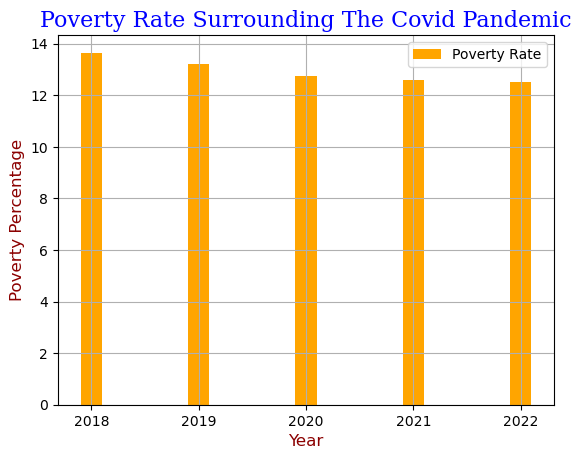

In [175]:
data = {
    'Year': [2018, 2019, 2020, 2021, 2022],
    "Poverty":[1476.57, 1423.68, 1381.29, 1368.37, 1364.39],
    "Poverty Rate":[13.65, 13.23, 12.74, 12.60, 12.52], 
    "Household Income": [59031.43, 61302.54, 63463.60, 67280.94, 73132.63],
    "Per Capita Income":[30138.09, 31389.58, 32478.07, 34384.20, 37676.29],
}

poverty_data = pd.DataFrame(data)
years = poverty_data['Year']

# plt.bar(years - 0.2, poverty_data["Poverty"], width=0.2, label="Poverty", color="red")
plt.bar(years, poverty_data["Poverty Rate"], width=0.2, label="Poverty Rate", color="orange")
# plt.bar(years + 0.2, poverty_data["Household Income"], width=0.2, label="Household Income", color="green")
# plt.bar(years + 0.4, poverty_data["Per Capita Income"], width=0.2, label="Per Capita Income", color="purple")

font1 = {'family': 'serif', 'color':  'blue', 'weight': 'normal', 'size': 16}
font2 = {'family': 'sans-serif', 'color':  'darkred', 'weight': 'normal', 'size': 12}

plt.title('Poverty Rate Surrounding The Covid Pandemic', fontdict=font1)
plt.xlabel('Year', fontdict=font2)
plt.ylabel('Poverty Percentage', fontdict=font2)
plt.legend()
plt.grid(True)

# Show the plot
plt.xticks(years)
plt.show()